In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

from random import randrange, random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.datasets import load_diabetes, load_boston
from sklearn.tree import export_graphviz
from IPython.display import Image

In [103]:
boston = load_boston()
X, y = boston.data[:,0:3], boston.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((404, 3), (404,), (102, 3), (102,))

In [105]:
num_estimator_list = [1,2,5,10,20,40,100,500,1000]
# Intialize Train and test lists
train_errors_bagging = []
test_errors_bagging = []

# Make a base tree, normally we would make these bushier but let's just use two so they're easier to visualize

regtree = DecisionTreeRegressor(max_depth = 2)

num_estimator_list = [1,2,5,10,20,40,100,500,1000]

for num_est in num_estimator_list:
    
    bag = BaggingRegressor(base_estimator=regtree, n_estimators=num_est, n_jobs=-1)
    bag.fit(X_train, y_train)
    y_pred_test =  bag.predict(X_test)
    y_pred_train =  bag.predict(X_train)
    
    train_errors_bagging.append(mean_squared_error(y_pred_train, y_train)) 
    test_errors_bagging.append(mean_squared_error(y_pred_test, y_test))


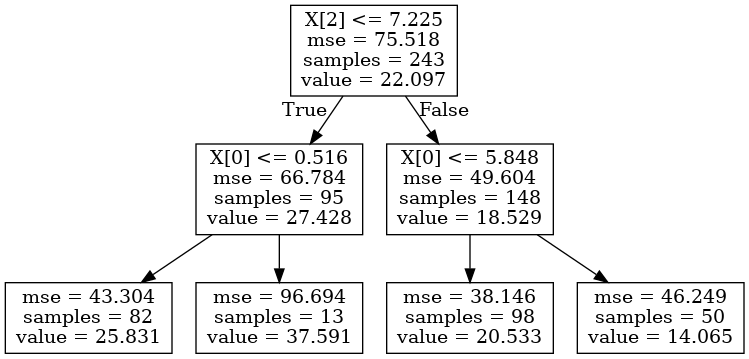

In [106]:
show_tree(bag.estimators_[0])

In [87]:
##Split data set in train 80% and test 20%
boston = load_boston()
X, y = boston.data[:,0:3], boston.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 3), (404,), (102, 3), (102,))

In [88]:
n_estimators = [1,2,5,10,20,40,100,500,1000]

DT_train_mse = []
DT_test_mse = []

for n_trees in n_estimators:
    trees = [DecisionTreeRegressor(max_depth = 3) for tree in range(n_trees)]
    fits = [tree.fit(X_train, y_train) for tree in trees]

    y_hats_train  = [tree.predict(X_train) for tree in trees]
    y_hats_test  = [tree.predict(X_test) for tree in trees]

    train_mses = [mean_squared_error(y_train, y_hat) for y_hat in y_hats_train]
    test_mses = [mean_squared_error(y_test, y_hat) for y_hat in y_hats_test]
    DT_train_mse.append(np.mean(train_mses))
    DT_test_mse.append(np.mean(test_mses))

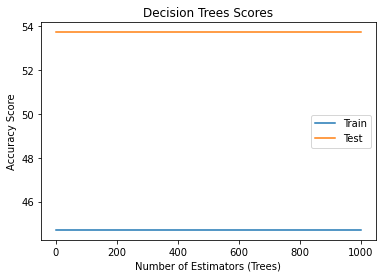

In [89]:
plt.plot(list(n_estimators), DT_train_mse, label = 'Train')
plt.plot(list(n_estimators), DT_test_mse, label = 'Test')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.title('Decision Trees Scores')
plt.legend();

In [90]:
def get_viz(one_tree):
    export_graphviz(trees[0], "tree.dot")
    !dot -Tpng tree.dot -o tree.png
    return Image('tree.png')

In [91]:
# get_viz(trees[0])

In [92]:
# get_viz(trees[1])

## Lets Try Bagging

In [93]:
def bootstrapped_samp(x_train, y_train, ratio=1):
    bootstrap_index= np.random.choice(range(len(X_train)),
                                    len(X_train),
                                    replace=True)
    return x_train[bootstrap_index], y_train[bootstrap_index]


In [94]:
bagged_train_mse = []
bagged_test_mse = []

for n_trees in n_estimators:
    bagged_trees = [DecisionTreeRegressor(max_depth = 2) for tree in range(n_trees)]
    indicies = [np.random.choice(range(len(X_train)), len(X_train),replace=True) for i in range(n_trees)]
    fits = [tree.fit(X_train[indicies[i]], y_train[indicies[i]]) for i,tree in enumerate(bagged_trees)]

    y_hats_train  = [tree.predict(X_train[indicies[i]]) for i,tree in enumerate(bagged_trees)]
    y_hats_test  = [tree.predict(X_test) for tree in bagged_trees]

    train_mses = [mean_squared_error(y_train[indicies[i]], y_hat_train)\
                  for i, y_hat_train in enumerate(y_hats_train)]
    test_mses = [mean_squared_error(y_test, y_hat) for y_hat in y_hats_test]
    bagged_train_mse.append(np.mean(train_mses))
    bagged_test_mse.append(np.mean(test_mses))


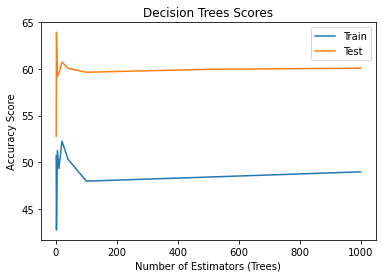

In [95]:
plt.plot(list(n_estimators), bagged_train_mse, label = 'Train')
plt.plot(list(n_estimators), bagged_test_mse, label = 'Test')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.title('Decision Trees Scores')
plt.legend();

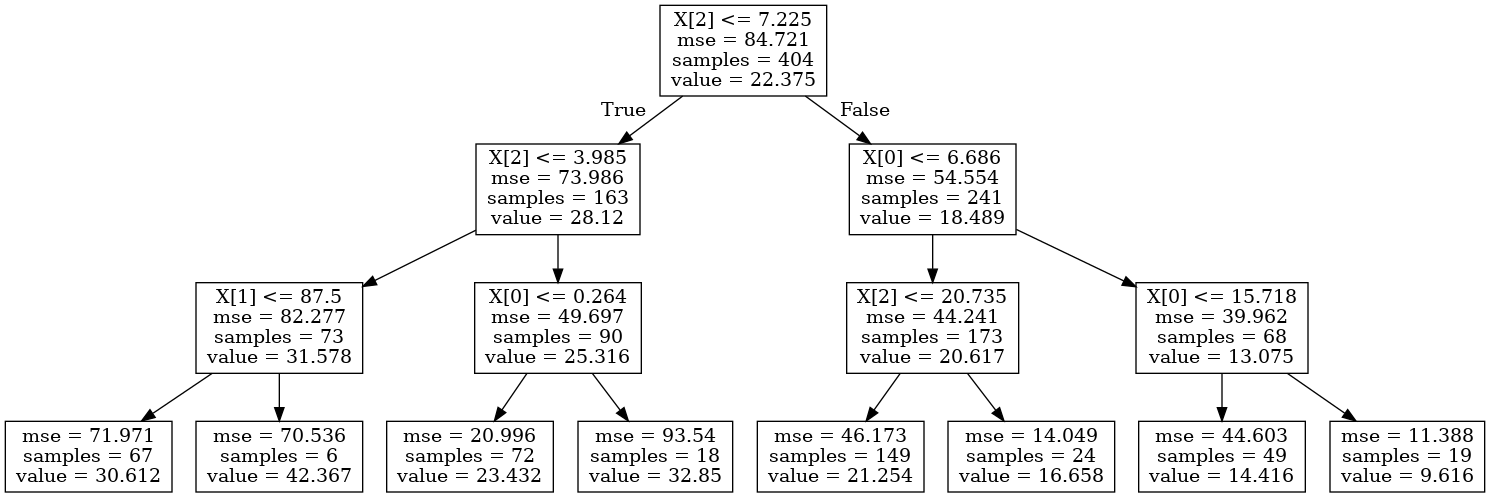

In [96]:
get_viz(bagged_trees[0])

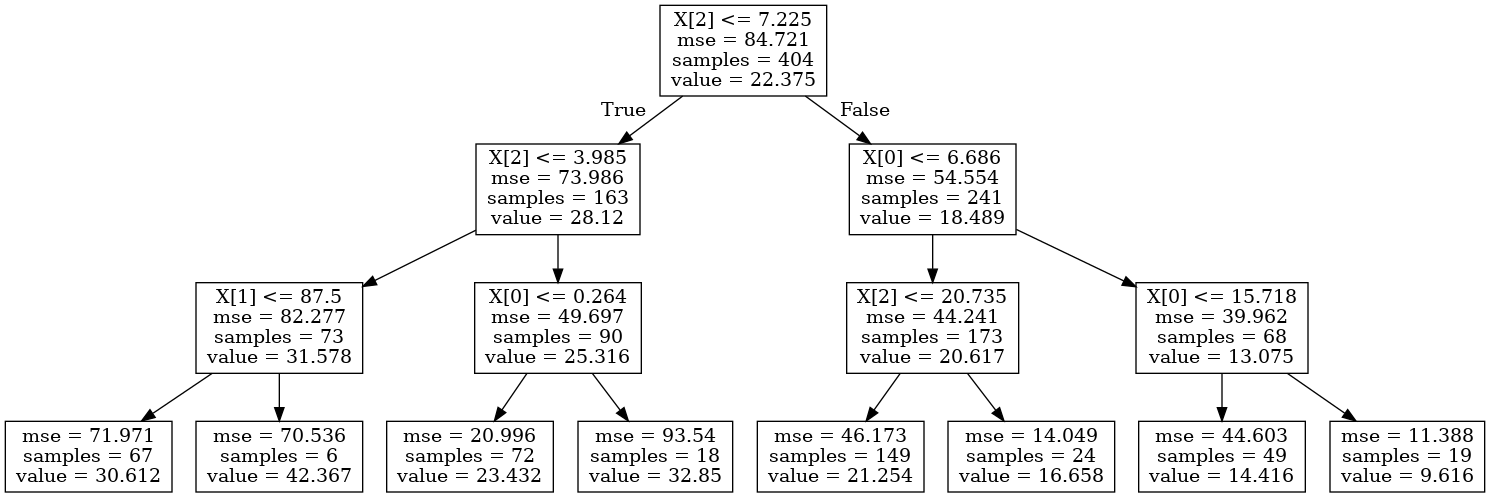

In [97]:
get_viz(bagged_trees[100])

In [98]:
bagged_train_mse = []
bagged_test_mse = []

basetree = DecisionTreeRegressor(max_depth = 2)

for n_trees in n_estimators:
    bagged_tree = BaggingRegressor(base_estimator=basetree, n_estimators=n_trees, n_jobs = -1)
    bagged_tree.fit(X_train, y_train)
    y_hats_test =  bagged_tree.predict(X_test)
    y_hats_train =  bagged_tree.predict(X_train)

    bagged_train_mse.append(mean_squared_error(y_hats_train, y_train)) 
    bagged_test_mse.append(mean_squared_error(y_hats_test, y_test))

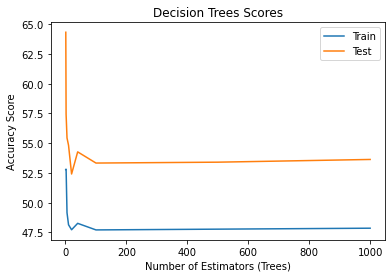

In [99]:
plt.plot(list(n_estimators), bagged_train_mse, label = 'Train')
plt.plot(list(n_estimators), bagged_test_mse, label = 'Test')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.title('Decision Trees Scores')
plt.legend();

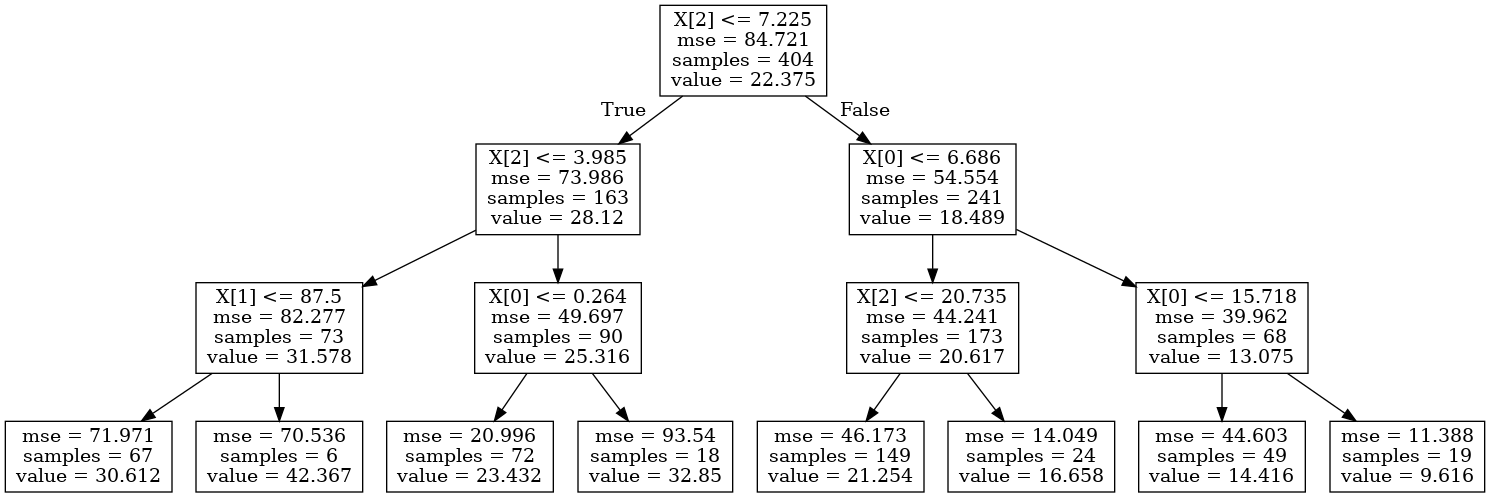

In [100]:
get_viz(bagged_tree.estimators_[0])

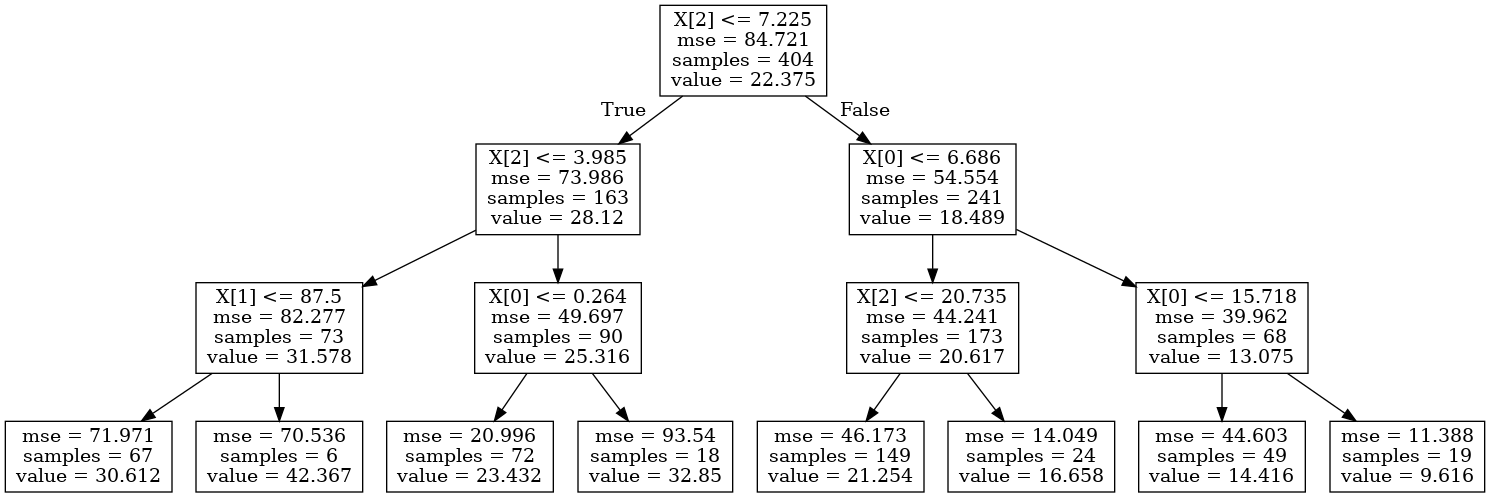

In [101]:
get_viz(bagged_tree.estimators_[5])